<a href="https://colab.research.google.com/github/fatmanurbas/BLM3120-Project-Online-Fraud-Detection-Program-/blob/main/OnlineFraudDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle 
import urllib.request
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'

od.download(download_url)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fatmanurbas
Your Kaggle Key: ··········


100%|██████████| 178M/178M [00:01<00:00, 109MB/s]


In [ ]:
fraudData= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')

In [ ]:
fraudData.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fraudData.shape

(6362620, 11)

In [ ]:
fraudData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# calculate correlation matrix
fraudData.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
fraudData = pd.get_dummies(fraudData,prefix=['type'], columns = ['type'], drop_first=True)
#type kısmını değiştirdik.

In [ ]:
fraudData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_OUT   uint8  
 11  type_DEBIT      uint8  
 12  type_PAYMENT    uint8  
 13  type_TRANSFER   uint8  
dtypes: float64(5), int64(3), object(2), uint8(4)
memory usage: 509.7+ MB


In [ ]:
fraudData.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,-0.012918,0.002869,0.004926,0.006925
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.004376,-0.023379,-0.197444,0.365896
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.210977,-0.021872,-0.193915,-0.087355
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.093476,0.006346,-0.238315,0.191701
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.001168,-0.000128,-0.001133,0.005245
type_CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,1.000000,-0.059625,-0.526422,-0.222672
type_DEBIT,0.002869,-0.023379,-0.021450,-0.021872,0.009347,0.006346,-0.002911,-0.000128,-0.059625,1.000000,-0.057868,-0.024478


In [ ]:
fraudData.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [ ]:
#preprocessing
fraudData.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# class count
class_count_0, class_count_1 = fraudData['isFraud'].value_counts()

# Separate class
class_0 = fraudData[fraudData['isFraud'] == 0]
class_1 = fraudData[fraudData['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 14)
class 1: (8213, 14)


total class of 1 and0: 0    32852
1     8213
Name: isFraud, dtype: int64


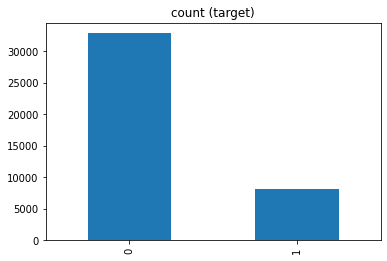

In [ ]:
class_0_under = class_0.sample(4*class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
balancing_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1511124,146,123530.88,C1300968702,7201855.87,7325386.74,C710830302,703796.65,580265.77,0,0,0,0,0,0
304579,15,183250.23,C422620113,221913.00,405163.23,C1598361703,472118.93,288868.70,0,0,0,0,0,0
2505032,204,12980.37,C171405920,203720.40,190740.03,M1713519548,0.00,0.00,0,0,0,0,1,0
1466182,140,2644.38,C690842969,381963.00,379318.62,M197327492,0.00,0.00,0,0,0,0,1,0
5204473,370,136340.26,C587265249,0.00,0.00,C1960981085,624957.25,761297.51,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


In [ ]:
balancing_data.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [ ]:
X = balancing_data[['oldbalanceDest', 'newbalanceDest', 'type_CASH_OUT','type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = balancing_data.loc[:,'isFraud'].values

In [ ]:
X

array([[7.03796650e+05, 5.80265770e+05, 0.00000000e+00, ...,
        1.23530880e+05, 7.20185587e+06, 7.32538674e+06],
       [4.72118930e+05, 2.88868700e+05, 0.00000000e+00, ...,
        1.83250230e+05, 2.21913000e+05, 4.05163230e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.29803700e+04, 2.03720400e+05, 1.90740030e+05],
       ...,
       [6.84888400e+04, 6.37989811e+06, 1.00000000e+00, ...,
        6.31140928e+06, 6.31140928e+06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.50002520e+05, 8.50002520e+05, 0.00000000e+00],
       [6.51009911e+06, 7.36010163e+06, 1.00000000e+00, ...,
        8.50002520e+05, 8.50002520e+05, 0.00000000e+00]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape,X_test.shape

((32852, 9), (8213, 9))

[9.75252819e+05 1.21820021e+06 3.84055765e-01 5.50955802e-03
 2.69268233e-01 1.65530257e-01 4.30014136e+05 9.94735364e+05
 7.26672277e+05]


In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

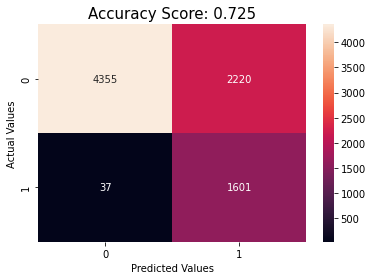

In [ ]:
predictions = model.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.99      0.66      0.79      6575
        >50K       0.42      0.98      0.59      1638

    accuracy                           0.73      8213
   macro avg       0.71      0.82      0.69      8213
weighted avg       0.88      0.73      0.75      8213



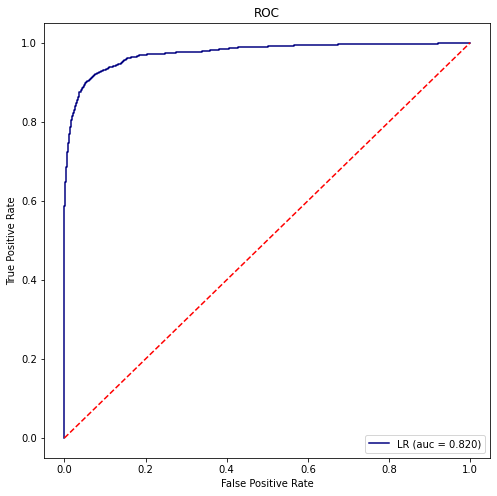

In [ ]:
plt.figure(figsize=(8,8))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='LR (auc = %0.3f)' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
d_tree1 = DecisionTreeClassifier(max_depth = 2)
d_tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

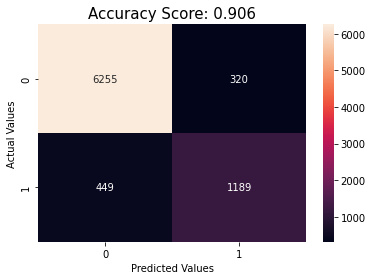

In [ ]:
predictions = d_tree1.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.93      0.95      0.94      6575
        >50K       0.79      0.73      0.76      1638

    accuracy                           0.91      8213
   macro avg       0.86      0.84      0.85      8213
weighted avg       0.90      0.91      0.90      8213



In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier
    
rf = RandomForestClassifier(n_estimators=100, max_depth = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

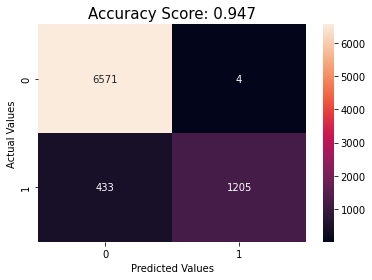

In [ ]:
predictions = rf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.94      1.00      0.97      6575
        >50K       1.00      0.74      0.85      1638

    accuracy                           0.95      8213
   macro avg       0.97      0.87      0.91      8213
weighted avg       0.95      0.95      0.94      8213

